In [1]:
import urllib3
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlas
import matplotlib


In [2]:
plt.style.use("ggplot")
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12,8)


In [3]:
Download_Root = "https://www.kaggle.com/teajay/global-shark-attacks?select=attacks.csv"
Data_Path = os.getcwd()
Data_Url = Download_Root + "datasets/"

# Vistazo previo

In [4]:
data = pd.read_csv('attacks.csv', encoding="ISO-8859-1"
)

In [5]:
data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [7]:
data.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [8]:
data["Species "].value_counts()

White shark                                                                  163
Shark involvement prior to death was not confirmed                           105
Invalid                                                                      102
Shark involvement not confirmed                                               88
Tiger shark                                                                   73
                                                                            ... 
2.1 m [7'] shark, possibly a spinner shark                                     1
Shark involvement prior to deaths unconfirmed                                  1
1.8 m [6'] reef shark - or a 2.1 m to 2.4 m [7' to 8'] grey-colored shark      1
Shortfin mako shark, 3 m to 3.4 m [10' to 11']                                 1
Raggedtooth shark, 2.7 m [9']                                                  1
Name: Species , Length: 1549, dtype: int64

In [9]:
data.describe()
data.shape

(25723, 24)

In [10]:
data_numeric = data.select_dtypes(include = [np.number])
numeric_cols = data_numeric.columns.values
numeric_cols

array(['Year', 'original order'], dtype=object)

In [11]:
data_non_numeric = data.select_dtypes(exclude = [np.number])
non_numeric_cols = data_non_numeric.columns.values.tolist()
non_numeric_cols

['Case Number',
 'Date',
 'Type',
 'Country',
 'Area',
 'Location',
 'Activity',
 'Name',
 'Sex ',
 'Age',
 'Injury',
 'Fatal (Y/N)',
 'Time',
 'Species ',
 'Investigator or Source',
 'pdf',
 'href formula',
 'href',
 'Case Number.1',
 'Case Number.2',
 'Unnamed: 22',
 'Unnamed: 23']

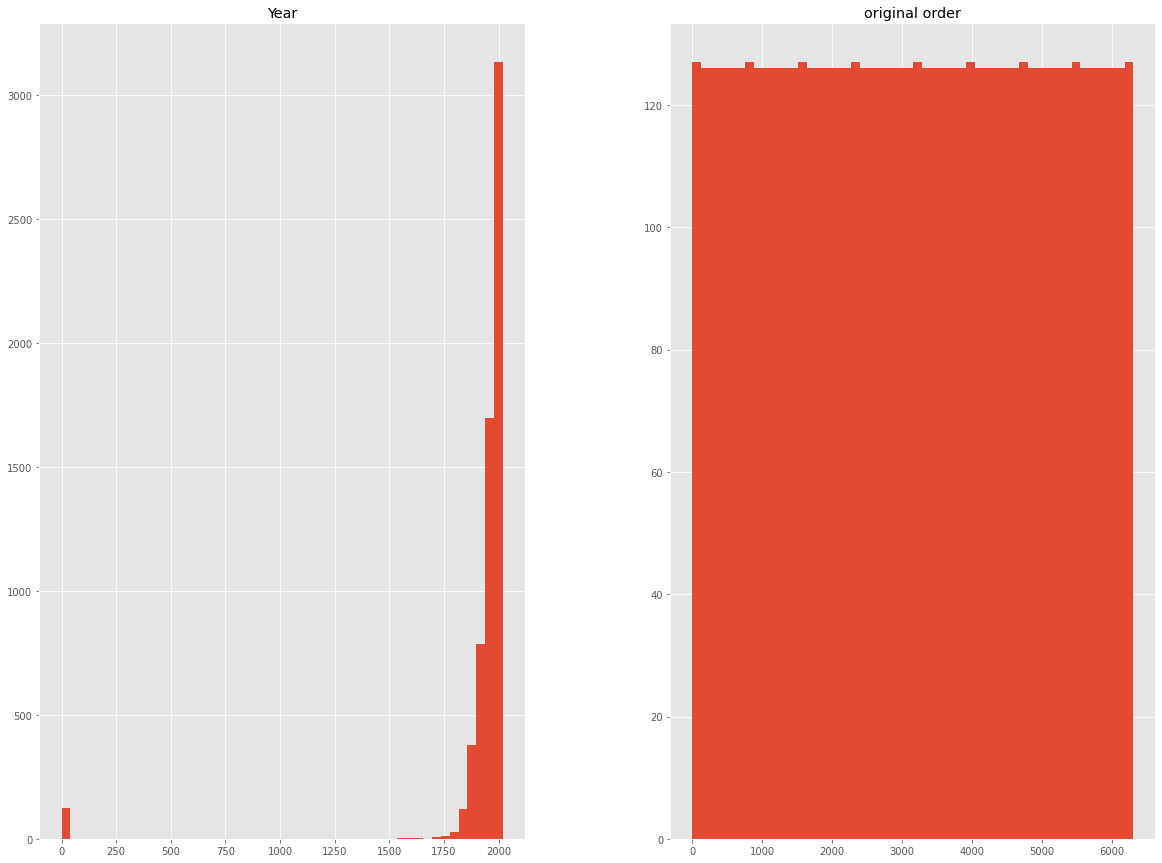

In [12]:
%matplotlib inline
data.hist(bins=50, figsize =(20,15))
plt.show()

# Detección de nulos y filtrado

<AxesSubplot:>

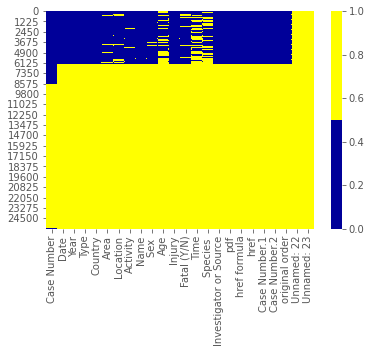

In [13]:
cols = data.columns
colors = ["#000099", "#ffff00"]
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colors))

In [14]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print(f"{col} - {round(pct_missing*100)}")

Case Number - 66
Date - 76
Year - 76
Type - 76
Country - 76
Area - 77
Location - 78
Activity - 78
Name - 76
Sex  - 78
Age - 87
Injury - 76
Fatal (Y/N) - 78
Time - 89
Species  - 87
Investigator or Source - 76
pdf - 76
href formula - 76
href - 76
Case Number.1 - 76
Case Number.2 - 76
original order - 75
Unnamed: 22 - 100
Unnamed: 23 - 100


created missing indicator for: Case Number
created missing indicator for: Date
created missing indicator for: Year
created missing indicator for: Type
created missing indicator for: Country
created missing indicator for: Area
created missing indicator for: Location
created missing indicator for: Activity
created missing indicator for: Name
created missing indicator for: Sex 
created missing indicator for: Age
created missing indicator for: Injury
created missing indicator for: Fatal (Y/N)
created missing indicator for: Time
created missing indicator for: Species 
created missing indicator for: Investigator or Source
created missing indicator for: pdf
created missing indicator for: href formula
created missing indicator for: href
created missing indicator for: Case Number.1
created missing indicator for: Case Number.2
created missing indicator for: original order
created missing indicator for: Unnamed: 22
created missing indicator for: Unnamed: 23


<AxesSubplot:xlabel='index'>

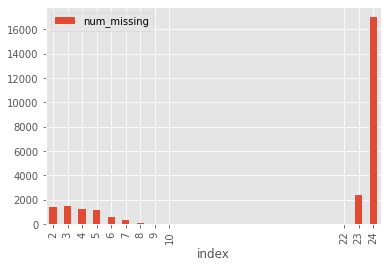

In [15]:
for col in data.columns:
    missing = data[col].isnull()
    num_missing = np.sum(missing)
    if num_missing > 0:
        print(f"created missing indicator for: {col}")
        data[f"{col}_is_missing"] = missing
is_missing_cols = [col for col in data.columns if "is_missing" in col]
data["num_missing"] = data[is_missing_cols].sum(axis = 1)
data["num_missing"].value_counts().reset_index().sort_values(by="index").plot.bar(x = "index", y = "num_missing")

In [16]:
ind_missing = data[data["num_missing"]>10].index
data_less_missing_rows = data.drop(ind_missing, axis = 0)
data_less_missing_rows.head()


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Investigator or Source_is_missing,pdf_is_missing,href formula_is_missing,href_is_missing,Case Number.1_is_missing,Case Number.2_is_missing,original order_is_missing,Unnamed: 22_is_missing,Unnamed: 23_is_missing,num_missing
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,False,False,False,False,False,False,False,True,True,2
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,False,False,False,False,False,False,False,True,True,3
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,False,False,False,False,False,False,False,True,True,3
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,False,False,False,False,False,False,False,True,True,4
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,False,False,False,False,False,False,False,True,True,4


In [17]:
clean_without_miss = data_less_missing_rows.loc[:,~data_less_missing_rows.columns.str.endswith('missing')]
clean_data = clean_without_miss.iloc[:, :-8]
clean_data.head()
clean_without_miss

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN


# Cambio de typos de las columnas

## Date to Datetime

In [18]:
clean_data["Date"] = clean_data["Date"].str.replace("Reported","")
clean_data["Date"] = clean_data["Date"].str.replace("-","")
clean_data["Date"]  = pd.to_datetime(clean_data["Date"], errors= "coerce")
clean_data["Date"].isna().sum()


306

Que le follen a la puta columna de date, 2 horas y sigo sin tener un formato en concreto

In [19]:
print(clean_data["Type"].nunique())
clean_data["Type"].value_counts()

8


Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: Type, dtype: int64

In [20]:
clean_data["Type"] = clean_data["Type"].astype("category")

In [21]:
len(clean_data["Activity"].value_counts())

1532

In [22]:
clean_data["Sex "]

0       F
1       F
2       M
3       M
4       M
       ..
6297    M
6298    M
6299    M
6300    M
6301    M
Name: Sex , Length: 6302, dtype: object

In [23]:
clean_data["Sex "] = clean_data["Sex "].replace("M ", "M")
clean_data["Sex "].str.strip()

clean_data["Sex "] = ["N" if i in ["lli", "."] else i for i in clean_data["Sex "]]        
print(clean_data["Sex "].value_counts())

M    5096
F     637
N       4
Name: Sex , dtype: int64


In [24]:
clean_data["Sex "] = clean_data["Sex "].astype("category")

In [25]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Case Number             6301 non-null   object        
 1   Date                    5996 non-null   datetime64[ns]
 2   Year                    6300 non-null   float64       
 3   Type                    6298 non-null   category      
 4   Country                 6252 non-null   object        
 5   Area                    5847 non-null   object        
 6   Location                5762 non-null   object        
 7   Activity                5758 non-null   object        
 8   Name                    6092 non-null   object        
 9   Sex                     5737 non-null   category      
 10  Age                     3471 non-null   object        
 11  Injury                  6274 non-null   object        
 12  Fatal (Y/N)             5763 non-null   object  

In [26]:
print(clean_data["Fatal (Y/N)"].nunique())
clean_data["Fatal (Y/N)"].value_counts()


8


N          4293
Y          1388
UNKNOWN      71
 N            7
2017          1
M             1
N             1
y             1
Name: Fatal (Y/N), dtype: int64

In [27]:
clean_data["Fatal (Y/N)"] = clean_data["Fatal (Y/N)"].str.upper()

In [28]:
dic = dict.fromkeys(["M", "M ", "2017"], "UNKNOWN")
dic.update({" N" : "N", "N ": "N"})
dic

{'M': 'UNKNOWN', 'M ': 'UNKNOWN', '2017': 'UNKNOWN', ' N': 'N', 'N ': 'N'}

In [29]:
clean_data = clean_data.replace({"Fatal (Y/N)": dic})

In [30]:
clean_data["Fatal (Y/N)"].value_counts()

N          4301
Y          1389
UNKNOWN      73
Name: Fatal (Y/N), dtype: int64

In [31]:
clean_data["Fatal (Y/N)"] = clean_data["Fatal (Y/N)"].astype("category")

In [32]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Case Number             6301 non-null   object        
 1   Date                    5996 non-null   datetime64[ns]
 2   Year                    6300 non-null   float64       
 3   Type                    6298 non-null   category      
 4   Country                 6252 non-null   object        
 5   Area                    5847 non-null   object        
 6   Location                5762 non-null   object        
 7   Activity                5758 non-null   object        
 8   Name                    6092 non-null   object        
 9   Sex                     5737 non-null   category      
 10  Age                     3471 non-null   object        
 11  Injury                  6274 non-null   object        
 12  Fatal (Y/N)             5763 non-null   category

In [33]:
clean_data["Time"].value_counts()

Afternoon               187
11h00                   128
Morning                 121
12h00                   109
15h00                   108
                       ... 
Prior to 10h37            1
After Dusk                1
14h21                     1
Shortly before 12h00      1
10h00 / 11h00             1
Name: Time, Length: 366, dtype: int64

In [34]:
clean_data["Time"] = clean_data["Time"].fillna("UNKNOWN")

clean_data["Time"] = [i[:2] if i[:2].isnumeric() else i for i in  clean_data["Time"]]
print(dict(clean_data["Time"].value_counts()))

{'UNKNOWN': 3354, '11': 257, '16': 242, '15': 239, '14': 235, '12': 201, '13': 200, '17': 197, 'Afternoon': 187, '10': 179, '18': 131, '09': 123, 'Morning': 121, '08': 92, '07': 81, 'Night': 62, '19': 53, '06': 36, 'Late afternoon': 35, 'Evening': 34, '20': 30, 'Dusk': 15, 'A.M.': 12, 'P.M.': 12, '05': 11, 'Early morning': 11, 'Midday': 10, '03': 9, 'Early afternoon': 8, '23': 8, '02': 7, '01': 6, '21': 5, '--': 5, '22': 5, '04': 5, 'Midnight': 4, 'Sunset': 4, 'Late afternon': 2, 'AM': 2, ' ': 2, 'After noon': 2, 'Dawn': 2, 'Dark': 2, 'Just before noon': 2, '>17h30': 1, 'Just before dawn': 1, 'Daytime': 1, 'X': 1, 'Possibly same incident as 2000.08.21': 1, 'Late night': 1, 'Before 07h00': 1, '\xa0 ': 1, 'Between 11h00 & 12h00': 1, '8:04 pm': 1, '"After dark"': 1, 'Shortly after midnight': 1, '"Evening"': 1, 'Noon': 1, '  ': 1, 'Just before sundown': 1, 'After dusk': 1, 'After midnight': 1, '   ': 1, '9h00': 1, '30': 1, 'Shortly before 13h00': 1, '>08h00': 1, '00': 1, 'Before 10h30': 1,

In [35]:
for i in range(len(clean_data["Time"])):
    
    if str(clean_data["Time"][i])[:2].isnumeric():
        if 6 >= int(str(clean_data["Time"][i])[:2]) <= 11:
            clean_data["Time"][i] = "Morning"
        elif 12 >= int(str(clean_data["Time"][i])[:2]) <= 16:
            clean_data["Time"][i] = "Afternoon"
        elif 17 >= int(str(clean_data["Time"][i])[:2]) <= 19:
            clean_data["Time"][i] = "Evening"
        elif 20 >= int(str(clean_data["Time"][i])[:2]) or 5 <= int(str(clean_data["Time"][i])[:2]):
            clean_data["Time"][i] = "Night"
    else:
        if "afternoon" in clean_data["Time"][i].lower():
            clean_data["Time"][i] = "Afternoon"
        if "morning" in clean_data["Time"][i].lower():
            clean_data["Time"][i] = "Morning"
        if "evening" in clean_data["Time"][i].lower():
            clean_data["Time"][i] = "Evening"
        if "night" in clean_data["Time"][i].lower():
            clean_data["Time"][i] = "Nigth"
    
clean_data["Time"] = clean_data["Time"].str.lower()
clean_data["Time"] = clean_data["Time"].str.strip()
clean_data["Time"]


<ipython-input-35-9ce2a40e4991>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["Time"][i] = "Night"
<ipython-input-35-9ce2a40e4991>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["Time"][i] = "Evening"
<ipython-input-35-9ce2a40e4991>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["Time"][i] = "Afternoon"
<ipython-input-35-9ce2a40e4991>:14: SettingWithCopyWarning: 
A value is trying to be set on a

0           night
1         evening
2       afternoon
3         unknown
4         unknown
          ...    
6297      unknown
6298      unknown
6299      unknown
6300      unknown
6301      unknown
Name: Time, Length: 6302, dtype: object

In [36]:
clean_data["Time"] = ["unknown" if i not in ["unknown","afternoon", "evening", "nigth", "morning"] else i for i in clean_data["Time"]]

clean_data["Time"].value_counts()
clean_data["Time"] = clean_data["Time"].astype("category")

In [37]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Case Number             6301 non-null   object        
 1   Date                    5996 non-null   datetime64[ns]
 2   Year                    6300 non-null   float64       
 3   Type                    6298 non-null   category      
 4   Country                 6252 non-null   object        
 5   Area                    5847 non-null   object        
 6   Location                5762 non-null   object        
 7   Activity                5758 non-null   object        
 8   Name                    6092 non-null   object        
 9   Sex                     5737 non-null   category      
 10  Age                     3471 non-null   object        
 11  Injury                  6274 non-null   object        
 12  Fatal (Y/N)             5763 non-null   category

In [38]:
clean_data["Age"] = clean_data["Age"].str.strip()
clean_data["Age"] = clean_data["Age"].str.replace("[a-zA-Z]|½|\?|<|>|\"|-|\(|\)|\.|\'| |&", "", regex = True)
clean_data["Age"] = [None if len(str(i)) > 3 or i == "" else i for i in clean_data["Age"]]
clean_data["Age"] = clean_data["Age"].astype("float64")



{17.0: 154, 18.0: 151, 20.0: 151, 19.0: 143, 15.0: 139, 16.0: 138, 21.0: 120, 22.0: 117, 25.0: 108, 24.0: 106, 14.0: 102, 13.0: 94, 30.0: 85, 26.0: 83, 23.0: 81, 28.0: 81, 27.0: 78, 29.0: 78, 12.0: 73, 35.0: 69, 32.0: 69, 40.0: 59, 10.0: 56, 31.0: 52, 34.0: 50, 38.0: 48, 33.0: 45, 43.0: 44, 36.0: 43, 37.0: 42, 42.0: 38, 11.0: 38, 39.0: 38, 41.0: 38, 50.0: 36, 9.0: 36, 52.0: 35, 45.0: 33, 47.0: 30, 44.0: 29, 49.0: 28, 8.0: 28, 48.0: 28, 46.0: 27, 55.0: 23, 7.0: 22, 51.0: 20, 60.0: 18, 54.0: 17, 57.0: 16, 6.0: 15, 58.0: 15, 61.0: 13, 53.0: 13, 59.0: 11, 69.0: 10, 56.0: 10, 63.0: 9, 62.0: 8, 5.0: 7, 68.0: 7, 70.0: 6, 65.0: 5, 3.0: 5, 66.0: 4, 78.0: 4, 64.0: 4, 73.0: 3, 71.0: 3, 77.0: 3, 1.0: 2, 810.0: 2, 75.0: 2, 74.0: 2, 84.0: 1, 2.0: 1, 81.0: 1, 72.0: 1, 86.0: 1, 731.0: 1, 87.0: 1, 910.0: 1, 912.0: 1, 67.0: 1, 82.0: 1}


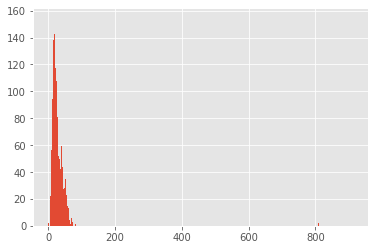

In [39]:
a = dict(clean_data["Age"].value_counts())
print(a)
#plt.hist(clean_data["Age"], bins = len(a))
plt.bar(a.keys(), a.values())
plt.show()

In [40]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Case Number             6301 non-null   object        
 1   Date                    5996 non-null   datetime64[ns]
 2   Year                    6300 non-null   float64       
 3   Type                    6298 non-null   category      
 4   Country                 6252 non-null   object        
 5   Area                    5847 non-null   object        
 6   Location                5762 non-null   object        
 7   Activity                5758 non-null   object        
 8   Name                    6092 non-null   object        
 9   Sex                     5737 non-null   category      
 10  Age                     3411 non-null   float64       
 11  Injury                  6274 non-null   object        
 12  Fatal (Y/N)             5763 non-null   category

## Convertir todo en minúsculas

In [41]:
clean_data = clean_data.applymap(lambda s:s.lower() if type(s) == str else s)
clean_data.columns = clean_data.columns.str.lower()
clean_data.columns = clean_data.columns.str.strip()

In [42]:
clean_data.head()


,case number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal (y/n),time,species,investigator or source
0,2018.06.25,2018-06-25,2018.0,boating,usa,california,"oceanside, san diego county",paddling,julie wolfe,f,57.0,"no injury to occupant, outrigger canoe and pad...",n,unknown,white shark,"r. collier, gsaf"
1,2018.06.18,2018-06-18,2018.0,unprovoked,usa,georgia,"st. simon island, glynn county",standing,adyson mcneely,f,11.0,minor injury to left thigh,n,evening,NaN,"k.mcmurray, trackingsharks.com"
2,2018.06.09,2018-06-09,2018.0,invalid,usa,hawaii,"habush, oahu",surfing,john denges,m,48.0,injury to left lower leg from surfboard skeg,n,afternoon,NaN,"k.mcmurray, trackingsharks.com"
3,2018.06.08,2018-06-08,2018.0,unprovoked,australia,new south wales,arrawarra headland,surfing,male,m,NaN,minor injury to lower leg,n,unknown,2 m shark,"b. myatt, gsaf"
4,2018.06.04,2018-06-04,2018.0,provoked,mexico,colima,la ticla,free diving,gustavo ramos,m,NaN,lacerations to leg & hand shark provoked incident,n,unknown,"tiger shark, 3m",a .kipper


## Quitar duplicados

In [43]:
df = clean_data.drop_duplicates()
print(df.shape, clean_data.shape)


(6302, 16) (6302, 16)


## Hacer columnas de año, mes dia

In [44]:
df["yea2r"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day

df.drop(["date", "year"], axis = 1, inplace = True)
df.rename(columns={"yea2r": "year"}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case number             6301 non-null   object 
 1   type                    6298 non-null   object 
 2   country                 6252 non-null   object 
 3   area                    5847 non-null   object 
 4   location                5762 non-null   object 
 5   activity                5758 non-null   object 
 6   name                    6092 non-null   object 
 7   sex                     5737 non-null   object 
 8   age                     3411 non-null   float64
 9   injury                  6274 non-null   object 
 10  fatal (y/n)             5763 non-null   object 
 11  time                    6302 non-null   object 
 12  species                 3464 non-null   object 
 13  investigator or source  6285 non-null   object 
 14  year                    5996 non-null   

## Columnas no informativas/Irrelevantes

In [45]:
num_rows = len(df.index)
low_information_cols = []
for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    if top_pct > 0.95:
        low_information_cols.append(col)
        print(f"{col}: {top_pct*100}")
        print("---------------------")

## Irregular data (outlier) 

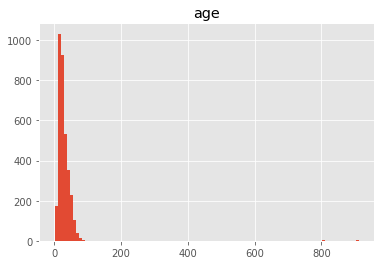

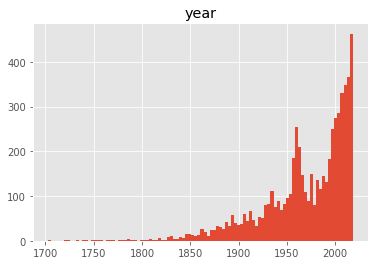

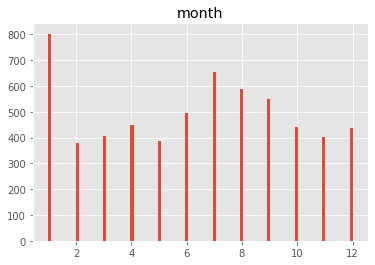

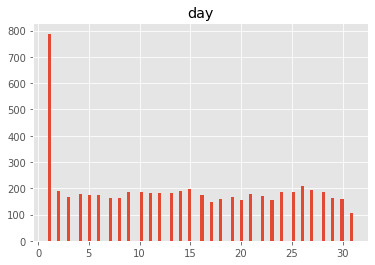

In [46]:
# columnas numericas
df_numeric = df.select_dtypes(include = [np.number])
numeric_cols = df_numeric.columns.values
for col in numeric_cols:
    df[col].hist(bins=100)
    plt.title(col)
    plt.show()

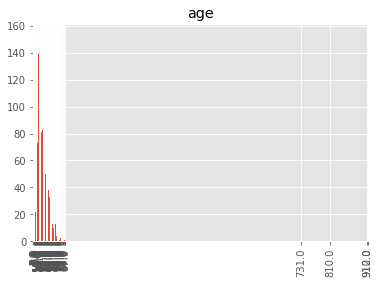

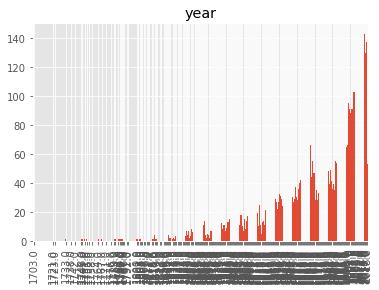

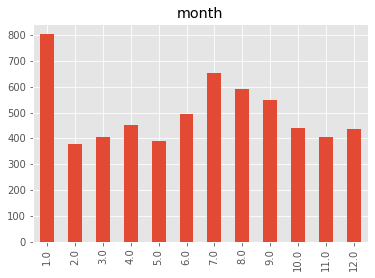

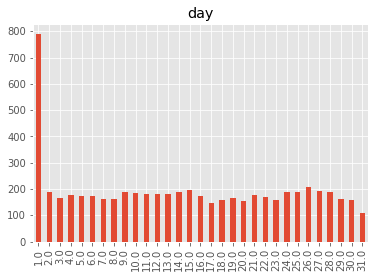

In [47]:
for col in numeric_cols:
    df[col].value_counts().plot.bar()
    plt.title(col)
    plt.show()

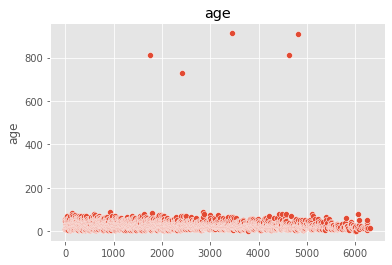

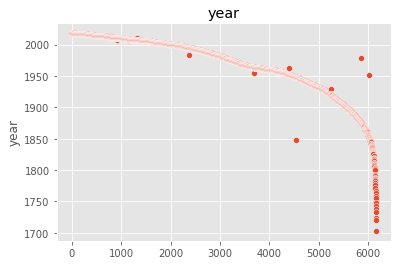

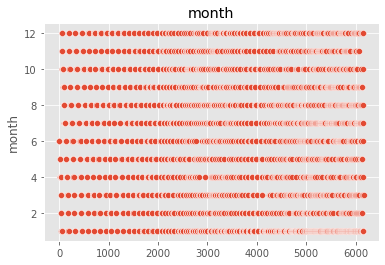

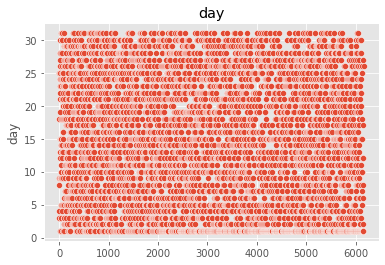

In [48]:
for col in numeric_cols:
    sns.scatterplot(data= df[col])
    plt.title(col)
    plt.show()


